In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab08A.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #08-A <br></center></h2>

<h1><center>Numerical differentiation<br></center></h1>

---

In [2]:
from resources.hashutils import *
import numpy as np
import matplotlib.pyplot as plt

# Question 1: Ant on a wire

A camera records the position of an ant as it walks on a wire. The ant generally moves forward (direction of increasing $x$ in the figure), but sometimes briefly turns around when it bumps into an oncoming ant. A researcher has processed the video and extracted a sequence of positions with their respective time stamps. In this exercise we will analyze this data to estimate the speed of the ant and count the number of times that it moves backwards. 


<img src="resources/ants.png" width="900"/>

## Question 1.1: Load the data

The data is stored in two files called `times.npy` and `positions.npy`. Load these two files into NumPy arrays called `time` and `xpos` respectively. 

**Hint**: [np.load](https://numpy.org/doc/stable/reference/generated/numpy.load.html)

In [3]:
time = np.load("times.npy")
xpos = np.load("positions.npy")

In [4]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Question 1.2: Plot the data

Plot the measured positions versus time. The plot should have these characteristics:

+ `figsize=(10,4)`
+ Use the `ax1.plot` function.
+ Use a `.` marker for the plot.
+ Add a grid.
+ Label the x-axis with `'time [sec]'`
+ Label the y-axis with `'position [mm]'`
+ Both x-axis and y-axis labels should have a font size of 16.
+ Remove the top and right-hand spines with  
```python 
ax1.spines[['top','right']].set_visible(False)
```

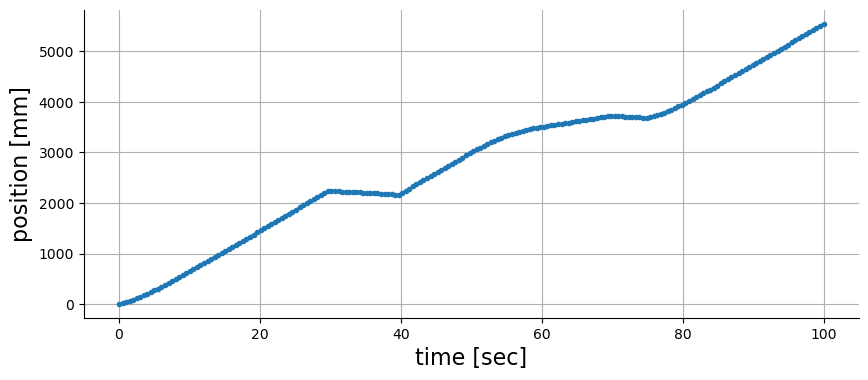

In [5]:
fig1, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(time,xpos, marker = ".")
ax1.grid()
ax1.set_xlabel('time [sec]', fontsize = 16)
ax1.set_ylabel('position [mm]', fontsize = 16)
ax1.spines[['top','right']].set_visible(False)

In [6]:
grader.check("q1p2")

q1p2 results: All test cases passed!

## Question 1.3: Estimate the time step $h$

The time step $h$ is the interval of time between time stamps in `time` array. These time stamps are uniformly spaced. 

In [7]:
h = time[1] - time[0]

In [8]:
grader.check("q1p3")

q1p3 results: All test cases passed!

## Question 1.4 Forward differencing

Write a function `diff_forward(f,h)` that computes the forward difference estimate of the derivative of a function $f(t)$ from uniformly spaced evaluations of the function. 

$$f'_F(t) = \frac{f(t+h)-f(t)}{h}$$

The function `diff_forward(f,h)` takes as inputs:
+ `f`: a 1D NumPy array of function evaluations, and 
+ `h`: the step size. 

The function should return a NumPy array whose shape is the same as that of `f`, and whose last entry is `np.nan`. 

In [9]:
def diff_forward(f,h):
    estimate = np.empty(len(f))
    for i in range(len(f)-1):
        estimate[i]= (f[i+1]-f[i])/h
    
    estimate[-1] = np.nan
    return estimate

In [10]:
grader.check("q1p4")

q1p4 results: All test cases passed!

## Question 1.5: Backward differencing

Write a function `diff_backward(f,h)` that computes the backward difference estimate of the derivative of a function $f(t)$ from uniformly spaced evaluations of the function. 

$$f'_B(t) = \frac{f(t)-f(t-h)}{h}$$

The input to this function is the same as to `diff_backward(f,h)`. The output is also similar, except that here the first (as opposed to the last) entry of the output array should be `np.nan`. 

In [11]:
def diff_backward(f,h):
    estimate = np.empty(len(f))
    for i in range(1,len(f)):
        estimate[i]= (f[i]-f[i-1])/h
    
    estimate[0] = np.nan
    return estimate

In [12]:
grader.check("q1p5")

q1p5 results: All test cases passed!

## Question 1.6: Central differencing

Write a function `diff_central(f,h)` that computes the central difference estimate of the derivative of a function $f(t)$ from uniformly spaced evaluations of the function. 

$$f'_C(t) = \frac{f(t+h)-f(t-h)}{2h}$$

The input to this function is the same as the previous two questions. The output is an array of the same shape as `f`, whose first and last entries are `np.nan`. 

In [13]:
def diff_central(f,h):
    estimate = np.empty(len(f))
    for i in range(1,len(f)-1):
        estimate[i]= (f[i+1]-f[i-1])/(2*h)
    
    estimate[0] = np.nan
    estimate[-1] = np.nan
    return estimate

In [14]:
grader.check("q1p6")

q1p6 results: All test cases passed!

## Question 1.7:  Plot the three speed estimates

Plot the three estimates of the ant's speed (forward, backward, and central differencing) versus time on a single plot. 
The characteristics of the plot are as follows:

+ `figsize=(8,4)`
+ Use a boolean mask to select the portions of `vF`, `vB`, and `vC` between time `time>=10` and `time<=20`, and plot only those portions of the velocity estimates. 
+ Label the x-axis with `'time [sec]'`
+ Label the y-axis with `'speed [mm/sec]'`
+ Both x-axis and y-axis labels should have a font size of 16.
+ Label the plots as `'Forward'`, `'Backward'`, or `'Central'`, and add a legend. 
+ Add grid lines to the plot. 

In [15]:
# ****** Don't modify this cell *******
vF = diff_forward(xpos,h)
vB = diff_backward(xpos,h)
vC = diff_central(xpos,h)
# *************************************

In [16]:
t = (time>=10)&(time<=20)

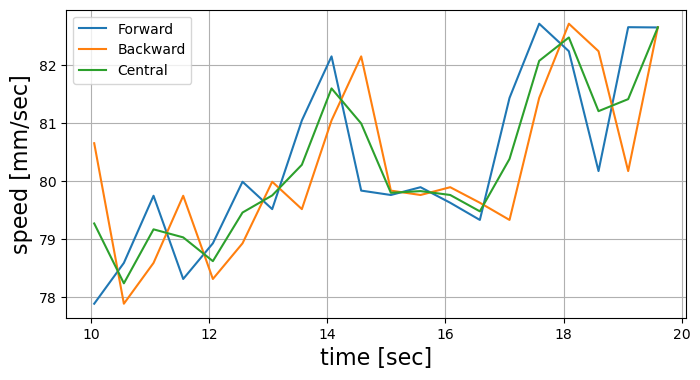

In [17]:
fig2, ax2 = plt.subplots(figsize=(8,4))
ax2.plot(time[t],vF[t], label = 'Forward')
ax2.plot(time[t],vB[t], label = 'Backward')
ax2.plot(time[t],vC[t], label = 'Central')
ax2.set_xlabel('time [sec]', fontsize= 16)
ax2.set_ylabel('speed [mm/sec]', fontsize= 16)
ax2.grid()
ax2.legend()

In [18]:
grader.check("q1p7")

q1p7 results: All test cases passed!

## Question 1.8: Count the number of times that the ant goes from moving forward to moving backward. 

Write a function called `count_turn_back` that takes the estimated speed profile as input and returns the number of times that it goes from a positive value to a negative value. 

In [19]:
def count_turn_backs(v):
    values = 0
    for i in range(0,len(v)-1):
        if v[i]<0 and v[i-1]>0:
            values +=1
        else:
            pass
    return values

In [20]:
grader.check("q1p8")

q1p8 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [21]:
grader.check_all()

q1p1 results: All test cases passed!

q1p2 results: All test cases passed!

q1p3 results: All test cases passed!

q1p4 results: All test cases passed!

q1p5 results: All test cases passed!

q1p6 results: All test cases passed!

q1p7 results: All test cases passed!

q1p8 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [23]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)